In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from scipy.io import loadmat

In [2]:
data = loadmat(r"C:\\Users\\Leonardo\\Desktop\\Projetos Python\\Pesquisa\\data\\dadosPonte15-05.mat")
data = data["data"][0, 0]  # Acessar o elemento dentro da matriz

data_dict = {}  # Dicionário para armazenar as colunas

# Iterar sobre os campos da estrutura
for field in data.dtype.names:
    # Obter os valores do campo e transformar em uma coluna
    values = np.squeeze(data[field])
    data_dict[field] = values

df = pd.DataFrame(data_dict)
df['Baseline'][0].shape


(1, 20000)

In [3]:
dados_baseline = pd.DataFrame()
dados_cinquenta = pd.DataFrame()
dados_vinte = pd.DataFrame()

for i in range(df['Baseline'].shape[0]):
    df_baseline = df['Baseline'][i][0]
    df_cinquenta = df['CinquentaP'][i][0]
    df_vinte = df['VinteP'][i][0]

    dados_temp_baseline = pd.DataFrame(df_baseline).transpose()
    dados_temp_cinquenta = pd.DataFrame(df_cinquenta).transpose()
    dados_temp_vinte = pd.DataFrame(df_vinte).transpose()

    dados_temp_baseline['y'] = 0
    dados_temp_cinquenta['y'] = 1
    dados_temp_vinte['y'] = 2

    dados_baseline = pd.concat([dados_baseline, dados_temp_baseline], ignore_index=True)
    dados_cinquenta = pd.concat([dados_cinquenta, dados_temp_cinquenta], ignore_index=True)
    dados_vinte = pd.concat([dados_vinte, dados_temp_vinte], ignore_index=True)

dados = pd.concat([dados_baseline, dados_cinquenta, dados_vinte], axis=0, ignore_index=True)

# Aplicar one-hot encoding para a coluna y
dados = pd.get_dummies(dados, columns=['y'])

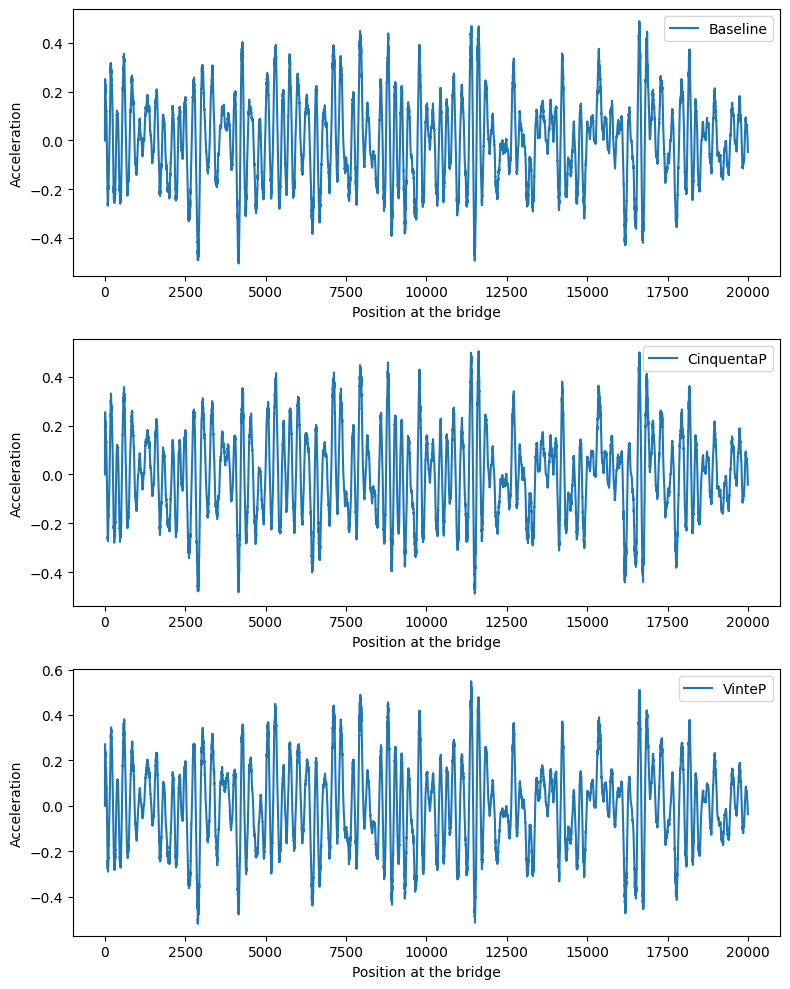

In [4]:
import matplotlib.pyplot as plt

exemplo_baseline = dados.loc[50:50].drop(['y_0', 'y_1', 'y_2'], axis=1)
exemplo_cinquenta = dados.loc[150:150].drop(['y_0', 'y_1', 'y_2'], axis=1)
exemplo_vinte = dados.loc[250:250].drop(['y_0', 'y_1', 'y_2'], axis=1)

x = range(20000)  # Eixo x de 0 a 19999

fig, axs = plt.subplots(3, 1, figsize=(8, 10))  # Criação dos subplots

# Plotagem do exemplo_baseline
axs[0].plot(x, exemplo_baseline.values.flatten(), label='Baseline')
axs[0].set_xlabel('Position at the bridge')
axs[0].set_ylabel('Acceleration')
axs[0].legend()

# Plotagem do exemplo_cinquenta
axs[1].plot(x, exemplo_cinquenta.values.flatten(), label='CinquentaP')
axs[1].set_xlabel('Position at the bridge')
axs[1].set_ylabel('Acceleration')
axs[1].legend()

# Plotagem do exemplo_vinte
axs[2].plot(x, exemplo_vinte.values.flatten(), label='VinteP')
axs[2].set_xlabel('Position at the bridge')
axs[2].set_ylabel('Acceleration')
axs[2].legend()

plt.tight_layout()
plt.show()


In [5]:
x = dados.drop(['y_0', 'y_1', 'y_2'], axis = 1)
y = pd.DataFrame().assign(Baseline=dados['y_0'], Cinquenta = dados['y_1'], Vinte = dados['y_2']).values

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2 ,random_state=42)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

Kclassif = KNeighborsClassifier(n_neighbors=3)
Kclassif.fit(x_train, y_train)

n_testes = 5
scores = cross_val_score(Kclassif, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}%")


Score for fold 1: 1.0
Score for fold 2: 0.9375
Score for fold 3: 0.9583333333333334
Score for fold 4: 0.8958333333333334
Score for fold 5: 0.9583333333333334
Average score: 95.0%


In [8]:
from sklearn.tree import DecisionTreeClassifier

Dec = DecisionTreeClassifier().fit(x_train, y_train)

n_testes = 5
scores = cross_val_score(Dec, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}% Correto!")

Score for fold 1: 0.8958333333333334
Score for fold 2: 0.7291666666666666
Score for fold 3: 0.8541666666666666
Score for fold 4: 0.75
Score for fold 5: 0.8125
Average score: 80.83% Correto!


In [9]:
from sklearn.neighbors import KNeighborsClassifier

Kclassif = KNeighborsClassifier(n_neighbors=4)
Kclassif.fit(x_train, y_train)

print(f'The score for the train data is: {Kclassif.score(x_train,y_train)}')
print(f'The score for the test data is: {Kclassif.score(x_test,y_test)}')
print(f'Average precision:{round((Kclassif.score(x_train,y_train)+Kclassif.score(x_test,y_test))*100/2, 2)}% Errado! ')

n_testes = 5
scores = cross_val_score(Kclassif, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}% Correto!")

The score for the train data is: 0.9833333333333333
The score for the test data is: 0.9666666666666667
Average precision:97.5% Errado! 
Score for fold 1: 1.0
Score for fold 2: 0.9375
Score for fold 3: 0.9583333333333334
Score for fold 4: 0.8958333333333334
Score for fold 5: 0.9583333333333334
Average score: 95.0% Correto!


In [10]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(20000, 1)),
#     tf.keras.layers.MaxPooling1D(2),
#     tf.keras.layers.Conv1D(64, 3, activation='relu'),
#     tf.keras.layers.MaxPooling1D(2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(3, activation='softmax')
# ]) 


In [11]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

In [12]:
# history = model.fit(x_train, y_train, epochs=20, batch_size=5, validation_data=(x_val, y_val))

In [13]:
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import accuracy_score

# ytestpred = model.predict(x_test)
# print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test.argmax(axis=1), ytestpred.argmax(axis=1))))

# #Your input to confusion_matrix must be an array of int not one hot encodings.
# ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), ytestpred.argmax(axis=1))